## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [17]:
!nvidia-smi

Sun Oct 15 19:41:56 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 516.40       Driver Version: 516.40       CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   43C    P0     7W /  N/A |      0MiB /  4096MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [18]:
import os
HOME = os.getcwd()
print(HOME)

c:\Users\ayush\Downloads\clothes


## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **27.01.2023** with version **YOLOv8.0.20**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [22]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20



In [23]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20  Python-3.9.2rc1 torch-2.1.0+cpu CPU
Setup complete  (16 CPUs, 15.7 GB RAM, 176.7/475.7 GB disk)


In [24]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://docs.ultralytics.com/usage/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Inference with Pre-trained COCO Model

In [25]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets



from roboflow import Roboflow
rf = Roboflow(api_key="PRsUQ8s5DPMN9MS0SHVk")
project = rf.workspace("ayush-ranjeet-singh-mkhne").project("person-detection-eg1n0")
dataset = project.version(1).download("yolov8")

The syntax of the command is incorrect.


[WinError 2] The system cannot find the file specified: 'c:\\Users\\ayush\\Downloads\\clothes/datasets'
c:\Users\ayush\Downloads\clothes
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.134`



Extracting Dataset Version Zip to person-detection-1 in yolov8:: 100%|██████████| 39/39 [00:00<00:00, 1228.69it/s]


## Custom Training

In [26]:
%cd {HOME}

!yolo mode=train model=yolov8s.pt data="C:\Users\ayush\Downloads\clothes\person-detection-1\data.yaml" epochs=100 imgsz=640 plots=True

c:\Users\ayush\Downloads\clothes


Ultralytics YOLOv8.0.20  Python-3.9.2rc1 torch-2.0.1+cpu CPU
yolo\engine\trainer: task=detect, mode=train, model=yolov8s.yaml, data=C:\Users\ayush\Downloads\clothes\person-detection-1\data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify

In [15]:
!ls {HOME}/runs/detect/train/

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [11]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

c:\Users\ayush\Downloads\clothes


FileNotFoundError: [Errno 2] No such file or directory: 'c:\\Users\\ayush\\Downloads\\clothes/runs/detect/train/confusion_matrix.png'

/kaggle/working


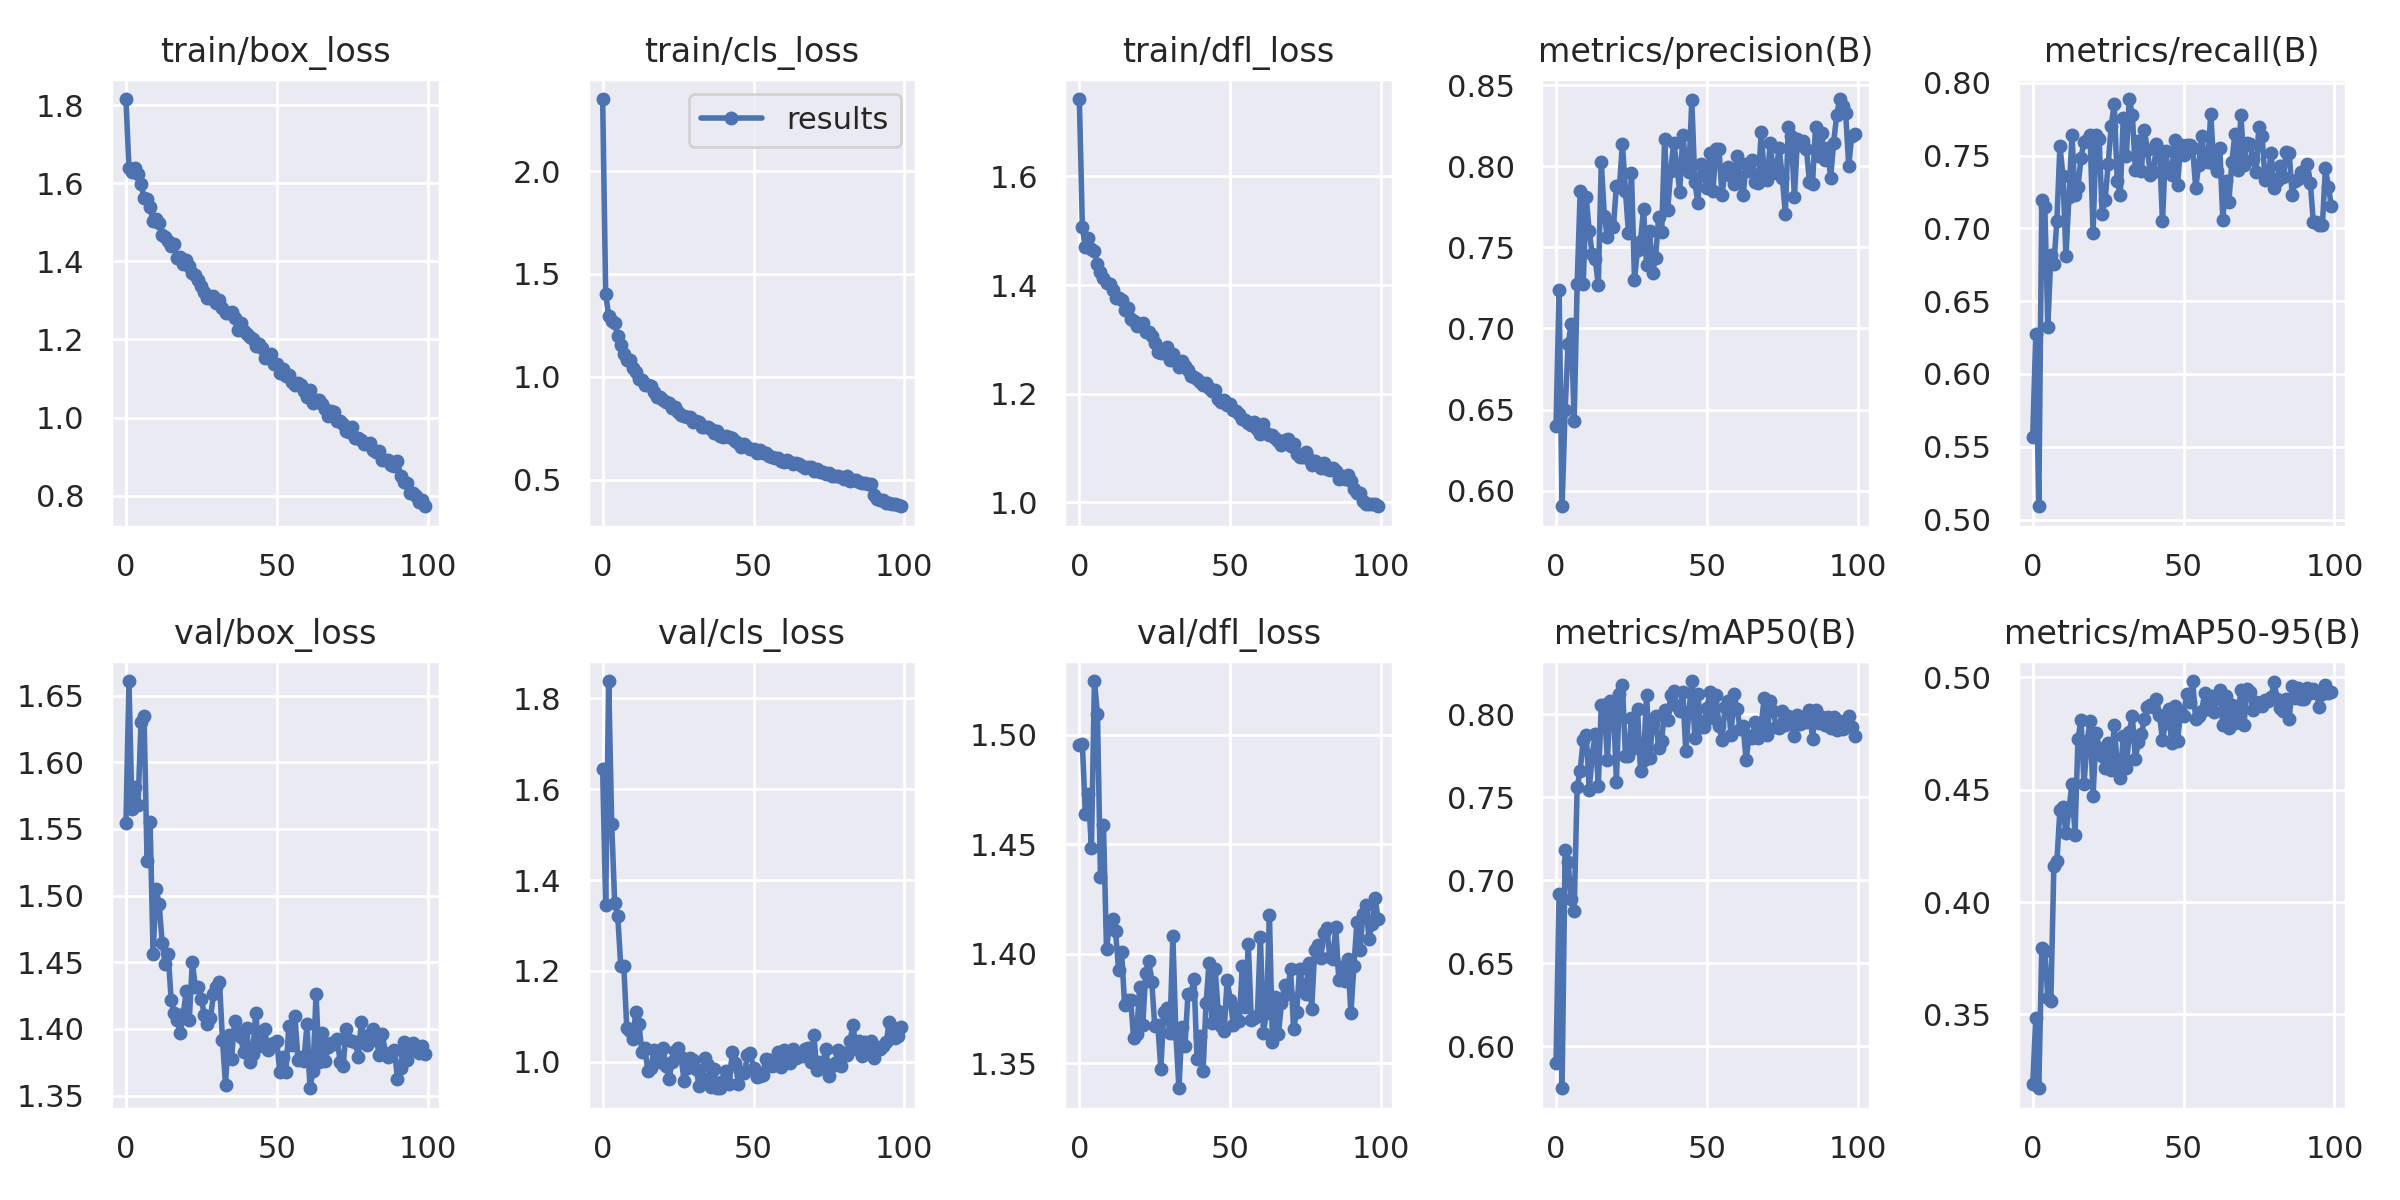

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/kaggle/working


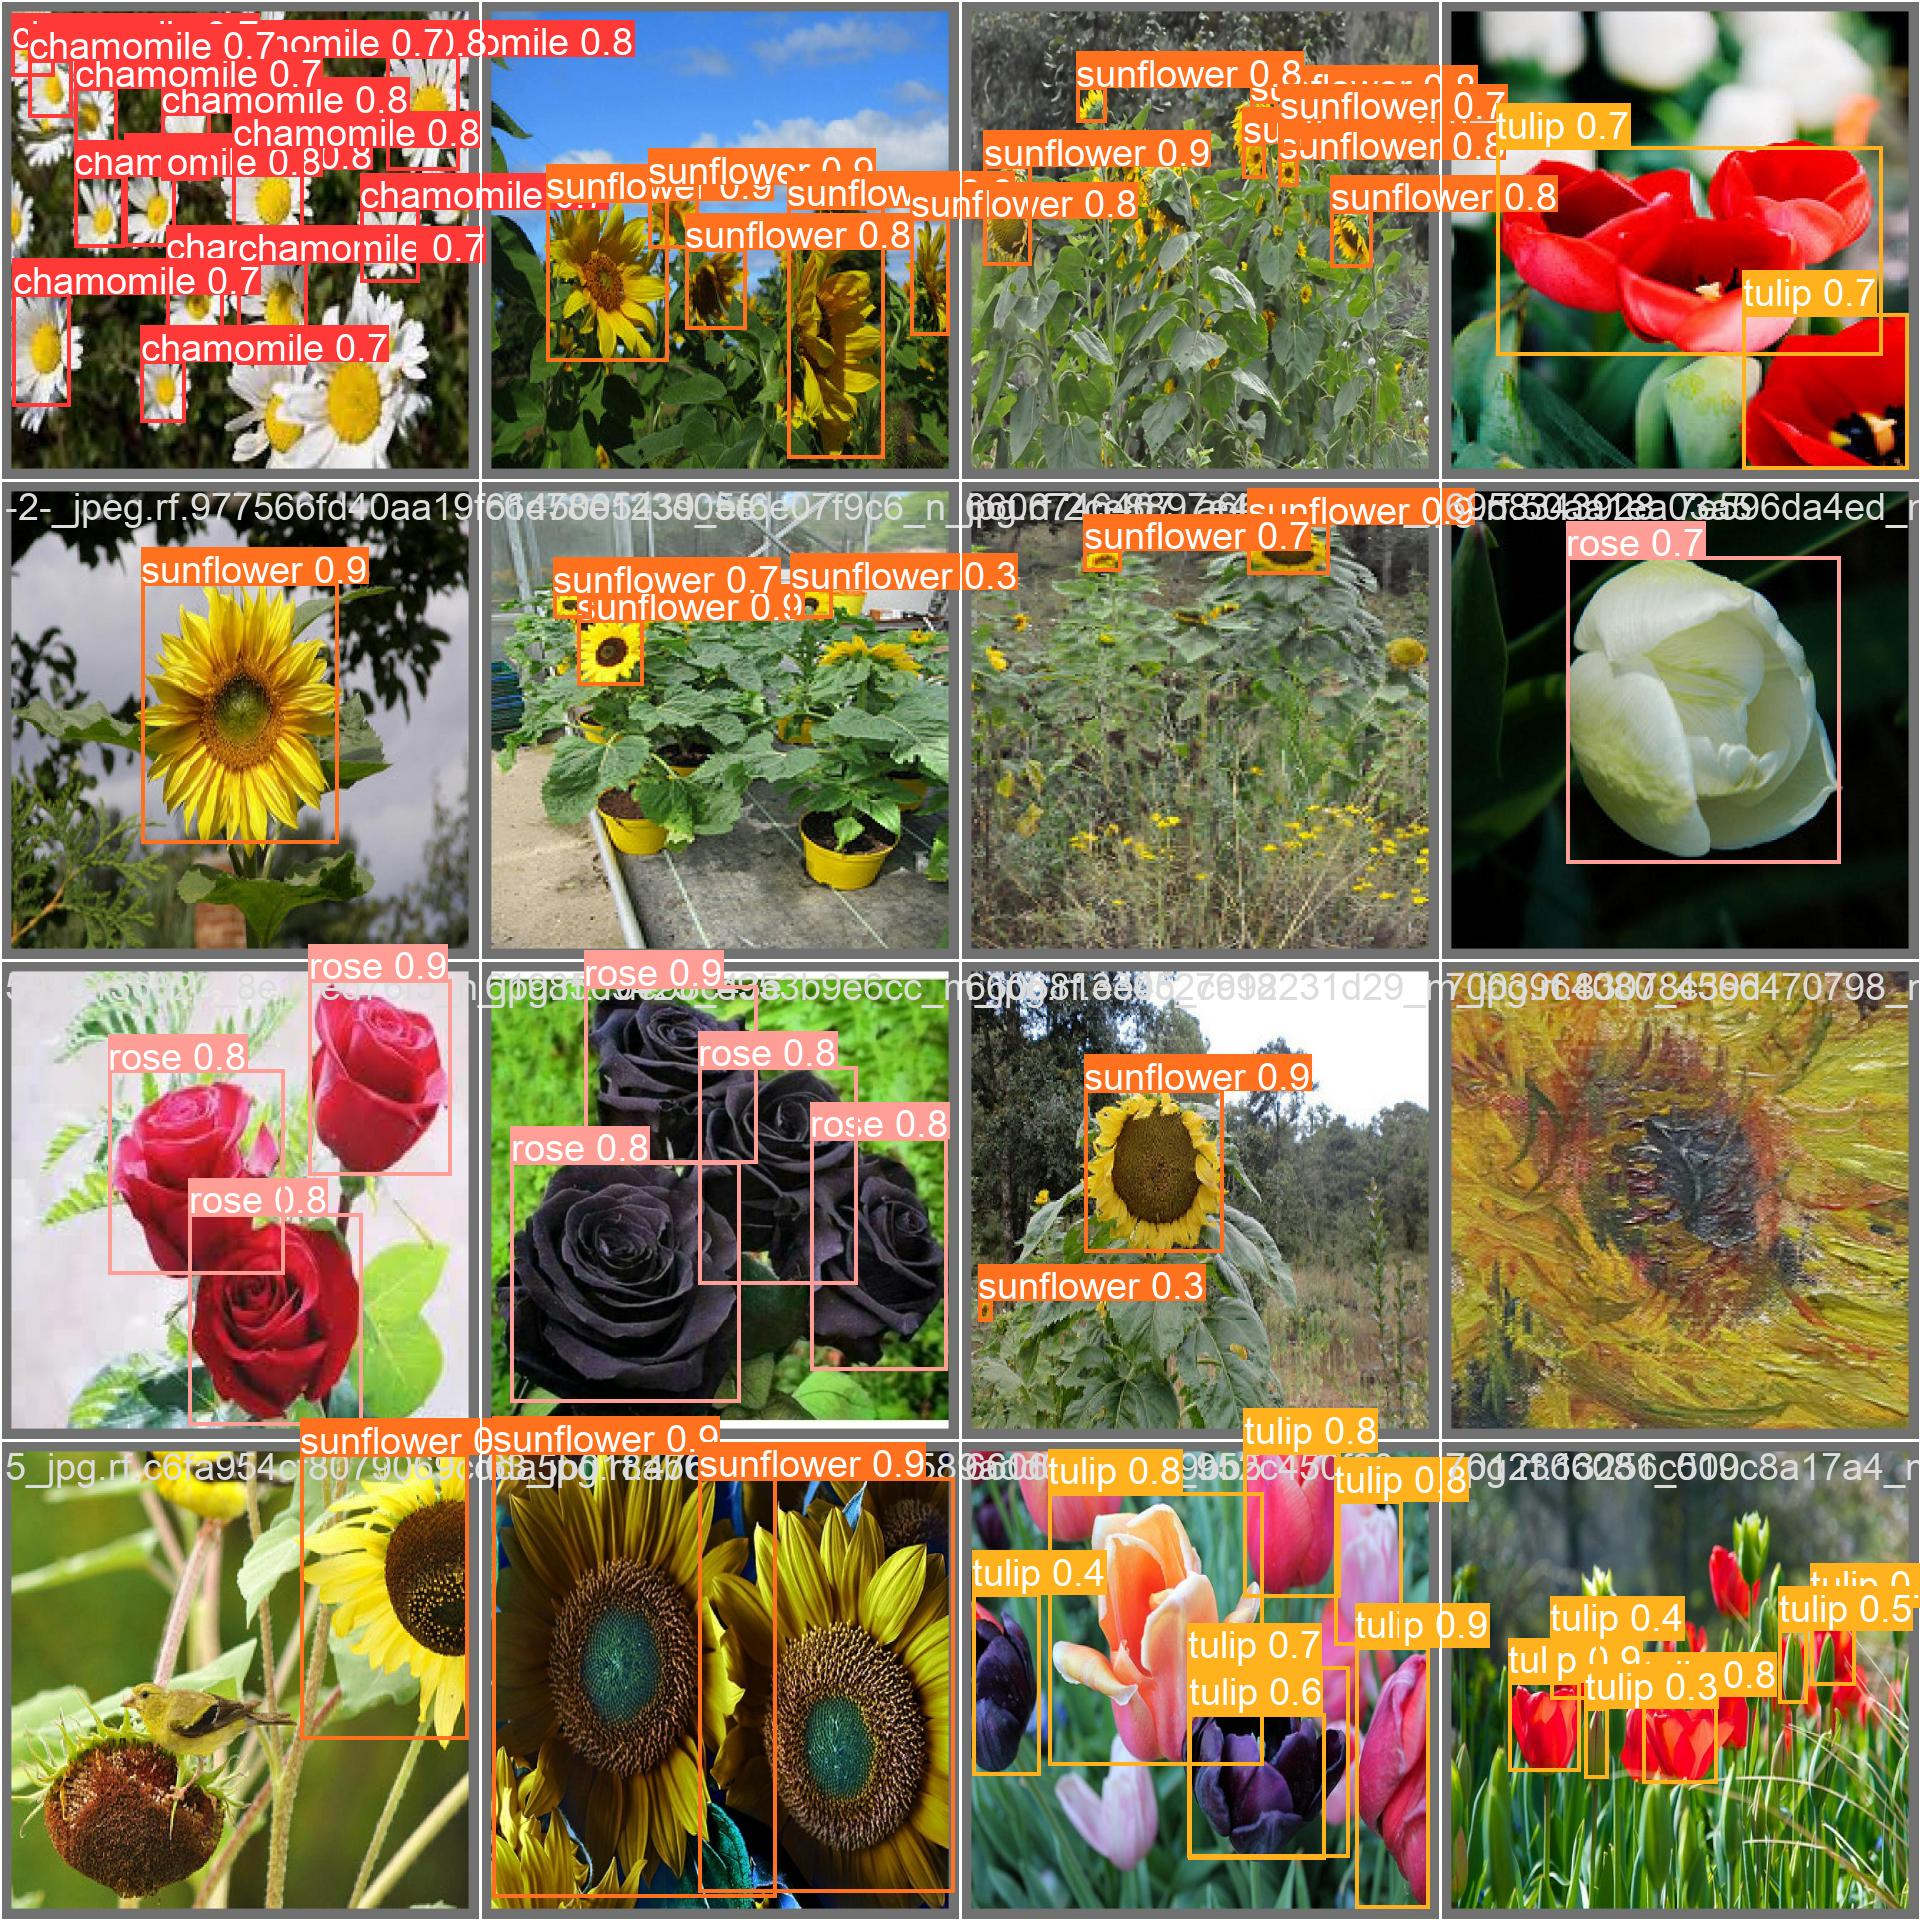

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [12]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

c:\Users\ayush\Downloads\clothes


Traceback (most recent call last):
  File "c:\users\ayush\appdata\local\programs\python\python39\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\users\ayush\appdata\local\programs\python\python39\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\ayush\AppData\Local\Programs\Python\Python39\Scripts\yolo.exe\__main__.py", line 7, in <module>
    sys.exit(entrypoint())
  File "c:\users\ayush\appdata\local\programs\python\python39\lib\site-packages\ultralytics\yolo\cfg\__init__.py", line 230, in entrypoint
    model = YOLO(model)
  File "c:\users\ayush\appdata\local\programs\python\python39\lib\site-packages\ultralytics\yolo\engine\model.py", line 60, in __init__
    {'.pt': self._load, '.yaml': self._new}[suffix](model)
  File "c:\users\ayush\appdata\local\programs\python\python39\lib\site-packages\ultralytics\yolo\engine\model.py", line 90, in _load
    self.model, self.ckpt = attempt_load_one_weigh

## Inference with Custom Model

In [13]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/kaggle/working
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable

**NOTE:** Let's take a look at few results.

In [14]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict3/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

## Deploy model on Roboflow

Once you have finished training your YOLOv8 model, you’ll have a set of trained weights ready for use. These weights will be in the `/runs/detect/train/weights/best.pt` folder of your project. You can upload your model weights to Roboflow Deploy to use your trained weights on our infinitely scalable infrastructure.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) now supports uploading YOLOv8 weights.

To upload model weights, add the following code to the “Inference with Custom Model” section in the aforementioned notebook:

In [15]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

Dependency ultralytics==8.0.134 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.134`
An error occured when getting the model upload URL: This version already has a trained model. Please generate and train a new version in order to upload model to Roboflow.


In [16]:
#While your deployment is processing, checkout the deployment docs to take your model to most destinations https://docs.roboflow.com/inference

In [17]:
#Run inference on your model on a persistant, auto-scaling, cloud API

#load model
model = project.version(dataset.version).model

#choose random test set image
import os, random
test_set_loc = dataset.location + "/test/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()
pred

running inference on Camomiles_Bokeh_Three_3_Grass_Lying_down_Legs_Heel_571165_300x199_jpg.rf.440ff6bb555075e7027d0e7c1164f1c0.jpg


{'predictions': [{'x': 585.5,
   'y': 345.5,
   'width': 101.0,
   'height': 213.0,
   'confidence': 0.6313626766204834,
   'class': 'tulip',
   'image_path': '/kaggle/working/datasets/Flower-Classification-2/test/images/Camomiles_Bokeh_Three_3_Grass_Lying_down_Legs_Heel_571165_300x199_jpg.rf.440ff6bb555075e7027d0e7c1164f1c0.jpg',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 419.0,
   'y': 272.0,
   'width': 60.0,
   'height': 84.0,
   'confidence': 0.48381537199020386,
   'class': 'chamomile',
   'image_path': '/kaggle/working/datasets/Flower-Classification-2/test/images/Camomiles_Bokeh_Three_3_Grass_Lying_down_Legs_Heel_571165_300x199_jpg.rf.440ff6bb555075e7027d0e7c1164f1c0.jpg',
   'prediction_type': 'ObjectDetectionModel'}],
 'image': {'width': '640', 'height': '640'}}